In [5]:
import os

In [1]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [2]:
# Faster R-CNN Paths and Files
FRCNN_CUSTOM_MODEL_NAME = 'my_faster_rcnn'
FRCNN_PRETRAINED_MODEL_NAME = 'faster_rcnn_resnet50_v1_640x640_coco17_tpu-8'
FRCNN_PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz'

In [3]:

EFF_CUSTOM_MODEL_NAME = 'my_efficient'
EFF_PRETRAINED_MODEL_NAME = 'efficientdet_d0_coco17_tpu-32'
EFF_PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz'


In [6]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc'),
    'FRCNN_CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models', FRCNN_CUSTOM_MODEL_NAME), 
    'FRCNN_OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models', FRCNN_CUSTOM_MODEL_NAME, 'export'), 
    'FRCNN_TFJS_PATH':os.path.join('Tensorflow', 'workspace','models', FRCNN_CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'FRCNN_TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models', FRCNN_CUSTOM_MODEL_NAME, 'tfliteexport'),
    'EFF_CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models', EFF_CUSTOM_MODEL_NAME), 
    'EFF_OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models', EFF_CUSTOM_MODEL_NAME, 'export'), 
    'EFF_TFJS_PATH':os.path.join('Tensorflow', 'workspace','models', EFF_CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'EFF_TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models', EFF_CUSTOM_MODEL_NAME, 'tfliteexport'),
 }

In [7]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'FRCNN_PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', FRCNN_CUSTOM_MODEL_NAME, 'pipeline.config'),
    'EFF_PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', EFF_CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [48]:
paths

{'WORKSPACE_PATH': 'Tensorflow\\workspace',
 'SCRIPTS_PATH': 'Tensorflow\\scripts',
 'APIMODEL_PATH': 'Tensorflow\\models',
 'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations',
 'IMAGE_PATH': 'Tensorflow\\workspace\\images',
 'MODEL_PATH': 'Tensorflow\\workspace\\models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet',
 'OUTPUT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\export',
 'TFJS_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\tfjsexport',
 'TFLITE_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\tfliteexport',
 'PROTOC_PATH': 'Tensorflow\\protoc',
 'FRCNN_CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\my_faster_rcnn',
 'FRCNN_OUTPUT_PATH': 'Tensorflow\\workspace\\models\\my_faster_rcnn\\export',
 'FRCNN_TFJS_PATH': 'Tensorflow\\workspace\\models\\my_faster_rcnn\\tfjsexport',
 'FRCNN_TFLITE_PATH': 'Tensorflow\\workspace\\models\\my_faster_rcnn\\tfliteexport',
 

In [6]:
for path in paths.values():
    if not os.path.exists(path):
        os.makedirs(path)

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
!pip install wget

  Using cached wget-3.2-py3-none-any.whl


In [7]:
import wget
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.19.6/protoc-3.19.6-win64.zip"
    wget.download(url)
    !move protoc-3.19.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.19.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_ssd_graph.py -> build\lib\

c:\Users\emili\OneDrive - Asia Pacific University\kuliah\year 3\FYP\FYP_PY\lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
c:\Users\emili\OneDrive - Asia Pacific University\kuliah\year 3\FYP\FYP_PY\lib\site-packages\setuptools\_distutils\cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead,

Obtaining file:///C:/Users/emili/OneDrive%20-%20Asia%20Pacific%20University/kuliah/year%203/FYP/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [21]:
import tensorflow as tf

In [6]:
!pip install --upgrade protobuf==3.19.6

  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl.metadata (806 bytes)
Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.8.0 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.8.0 which is incompatible.
tensorflow-text 2.10.0 requires tensorflow<2.11,>=2.10.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.8.0 which is incompatible.
tf-models-official 2.10.1 requires pyyaml<6.0,>=5.1, but you have pyyaml 6.0.1 which is incompatible.
tf-models-official 2.10.1 requires tensorflow~=2.10.0, but you have tensorflow 2.8.0 which is incompatible.
apache-beam 2.56.0 requires protobuf!=4.0.*,!=4.21.*,!=4.22.0,!

In [26]:
!pip list

Package                      Version             Editable project location
---------------------------- ------------------- ---------------------------------------------------------------------------------------------------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
gast                         0.5.4
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.64.0
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.4
ipython                      8.24.

In [5]:
!pip install --upgrade tensorflow==2.8.0

  Using cached tensorflow-2.8.0-cp310-cp310-win_amd64.whl.metadata (2.9 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.8.0-cp310-cp310-win_amd64.whl (438.0 MB)
Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.8.0 which is incompatible.
tensorflow-intel 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.8.0 which is incompatible.
tensorflow-text 2.10.0 requires tensorflow<2.11,>=2.10.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.8.0 which is incompatible.
tf-models-official 2.10.1 requires pyyaml<6.0,>=5.1, but you have pyyaml 6.0.1 which is incompatible.
tf-models-official 2.10.1 requires tensorflow~=2.10.0, but you have tensorflow 2.8.0 which is incompatible.


In [18]:
!python -c "import google.protobuf; print(google.protobuf.__version__)"


3.20.3


In [26]:
!pip list

Package                      Version             Editable project location
---------------------------- ------------------- ---------------------------------------------------------------------------------------------------
absl-py                      2.1.0
anyio                        4.4.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
cachetools                   5.3.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contextlib2                  21.6.0
contourpy                    1.2.1
cycler                       0.12.1
Cython                       3

In [13]:
pip install "cython<3.0.0"

Note: you may need to restart the kernel to use updated packages.


In [14]:
 !pip install --no-build-isolation pyyaml==5.4.1

In [8]:
!pip install tf-models-official

  Using cached PyYAML-5.4.1-cp310-cp310-win_amd64.whl
  Using cached tensorflow-2.10.1-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow-2.10.1-cp310-cp310-win_amd64.whl (455.9 MB)
Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: pyyaml
    Foun

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.15.0 requires tensorflow-estimator<2.16,>=2.15.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

C:\Users\emili\AppData\Local\Programs\Python\Python310\python.exe: can't open file 'c:\\Users\\emili\\OneDrive - Asia Pacific University\\kuliah\\year 3\\FYP\\FYP_PY\\Tensorflow\\models\\research\\object_detection\\builders\\model_builder_tf2_test.py': [Errno 2] No such file or directory


In [6]:
import wget

In [20]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


### Downloading the RCNN

In [111]:
import tarfile
import urllib.request

def download_model(pretrained_model_name, pretrained_model_url):
    MODEL_TAR_FILENAME = pretrained_model_name + '.tar.gz'
    MODEL_DIR = os.path.join(paths['PRETRAINED_MODEL_PATH'], pretrained_model_name)

    if not os.path.exists(MODEL_DIR):
        urllib.request.urlretrieve(pretrained_model_url, MODEL_TAR_FILENAME)
        with tarfile.open(MODEL_TAR_FILENAME) as tar:
            tar.extractall(path=paths['PRETRAINED_MODEL_PATH'])
        os.remove(MODEL_TAR_FILENAME)

download_model(FRCNN_PRETRAINED_MODEL_NAME, FRCNN_PRETRAINED_MODEL_URL)


## Downloading EfficientNet

In [49]:
import tarfile
import urllib.request

def download_model(pretrained_model_name, pretrained_model_url):
    MODEL_TAR_FILENAME = pretrained_model_name + '.tar.gz'
    MODEL_DIR = os.path.join(paths['PRETRAINED_MODEL_PATH'], pretrained_model_name)

    if not os.path.exists(MODEL_DIR):
        urllib.request.urlretrieve(pretrained_model_url, MODEL_TAR_FILENAME)
        with tarfile.open(MODEL_TAR_FILENAME) as tar:
            tar.extractall(path=paths['PRETRAINED_MODEL_PATH'])
        os.remove(MODEL_TAR_FILENAME)

download_model(EFF_PRETRAINED_MODEL_NAME, EFF_PRETRAINED_MODEL_URL)


In [7]:
labels = [{'name':'Blight', 'id':1}, {'name':'Rust', 'id':2}, {'name':'Spot', 'id':3}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [51]:
labels = [{'name':'Blight', 'id':1}, {'name':'Rust', 'id':2}, {'name':'Spot', 'id':3}]

# Model config

In [22]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [50]:
import os
import shutil

def copy_pipeline_config(pretrained_model_name, checkpoint_path):
    source = os.path.join(paths['PRETRAINED_MODEL_PATH'], pretrained_model_name, 'pipeline.config')
    destination = os.path.join(checkpoint_path)
    if os.name == 'posix':
        shutil.copy(source, destination)
    if os.name == 'nt':
        shutil.copy(source, destination)


# Copy pipeline config for Faster R-CNN
copy_pipeline_config(EFF_PRETRAINED_MODEL_NAME, paths['EFF_CHECKPOINT_PATH'])



# Update config

In [52]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [71]:
config = config_util.get_configs_from_pipeline_file(files['EFF_PIPELINE_CONFIG'])

In [72]:
config

{'model': ssd {
   num_classes: 3
   image_resizer {
     fixed_shape_resizer {
       height: 512
       width: 512
     }
   }
   feature_extractor {
     type: "ssd_efficientnet-b0_bifpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 0.00039999998989515007
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
   }
   anchor_generator {
     multiscale_anchor_generator {
       min_level: 3
       max_level: 7
       anchor_scale: 4.0
       aspect_ratios: 1.0
       aspect_ratios: 2.0
       aspect_ratios: 0.5
       scales_per_octave: 3
     }
   }
   post_processing {
     batch_non_max_suppression {
       score_threshold: 0.

In [73]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['FRCNN_PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [74]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.tfrecord')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.tfrecord')]

In [75]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['EFF_PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)  

# Model Training

In [20]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [15]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [132]:
# Command for training Faster R-CNN
frcnn_train_command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(
    TRAINING_SCRIPT, paths['FRCNN_CHECKPOINT_PATH'], files['FRCNN_PIPELINE_CONFIG'])

In [63]:
# Command for training Faster R-CNN
EFF_train_command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(
    TRAINING_SCRIPT, paths['EFF_CHECKPOINT_PATH'], files['EFF_PIPELINE_CONFIG'])

In [64]:
print(EFF_train_command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_efficient --pipeline_config_path=Tensorflow\workspace\models\my_efficient\pipeline.config --num_train_steps=5000


In [133]:
print(frcnn_train_command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_faster_rcnn --pipeline_config_path=Tensorflow\workspace\models\my_faster_rcnn\pipeline.config --num_train_steps=5000


In [16]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


# Model Evaluation

In [12]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [134]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['FRCNN_CHECKPOINT_PATH'],files['FRCNN_PIPELINE_CONFIG'], paths['FRCNN_CHECKPOINT_PATH'])

In [21]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['EFF_CHECKPOINT_PATH'],files['EFF_PIPELINE_CONFIG'], paths['EFF_CHECKPOINT_PATH'])

In [22]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_efficient --pipeline_config_path=Tensorflow\workspace\models\my_efficient\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_efficient


In [14]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Your TensorFlow code here


Num GPUs Available:  1


In [15]:
import torch

# Move a tensor to the GPU (if available)
tensor = torch.randn(10, 10)  # Create a random tensor
if torch.cuda.is_available():
  tensor = tensor.cuda()

# Perform some operation on the tensor (e.g., multiplication)
result = tensor * 2

# Print the device where the tensor is located
print(result.device)

cuda:0


In [16]:
!{command}

^C


2024-06-18 21:09:31.469616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2024-06-18 21:09:31.471109: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-18 21:09:44.654604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2024-06-18 21:09:44.656246: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2024-06-18 21:09:44.657723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2024-06-18 21:09:44.659163: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [ ]:
!cd Tensorflow\workspace\models\my_ssd_mobnet\eval\tensorboard --logdir=.

In [ ]:
!cd Tensorflow\workspace\models\my_ssd_mobnet\train\tensorboard --logdir=.

# Load model from checkpoint

In [8]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [28]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-8')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [26]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['FRCNN_PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['FRCNN_CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [30]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['EFF_PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['EFF_CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from image

In [11]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

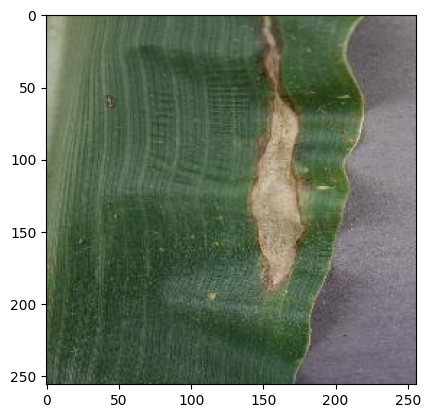

In [31]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', r"C:\Users\emili\OneDrive - Asia Pacific University\kuliah\year 3\FYP\Tensorflow\workspace\images\test\Blight_Corn_Blight (119).jpg")
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=20,
            min_score_thresh=.1,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

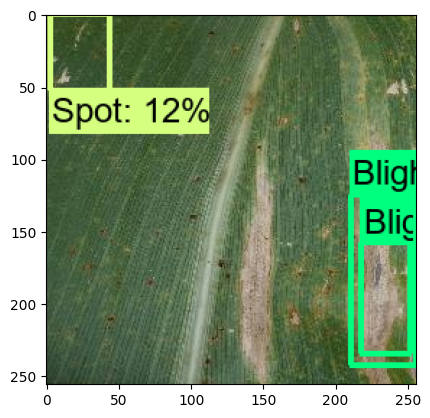

In [32]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', r"C:\Users\emili\OneDrive - Asia Pacific University\kuliah\year 3\FYP\Tensorflow\workspace\images\test\Blight_Corn_Blight (1038).jpg")
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=.1,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [45]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.builders import model_builder
from object_detection.exporter_lib_v2 import export_inference_graph
import os

# Define paths
pipeline_config_path = r"C:\Users\emili\OneDrive - Asia Pacific University\kuliah\year 3\FYP\Tensorflow\workspace\models\my_faster_rcnn\pipeline.config"
output_directory = r"C:\Users\emili\OneDrive - Asia Pacific University\kuliah\year 3\FYP\Tensorflow\workspace\models\my_faster_rcnn"

# Load pipeline config and build detection model
configs = config_util.get_configs_from_pipeline_file(pipeline_config_path)
model_config = configs['model']

# Build the model
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['EFF_CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Export the inference graph
export_inference_graph(
    input_type='image_tensor',
    pipeline_config=pipeline_config_path,
    trained_checkpoint_dir=os.path.join(paths['EFF_CHECKPOINT_PATH'], 'ckpt-6'),
    output_directory=output_directory)


AttributeError: 'dict' object has no attribute 'model'

In [36]:
import tensorflow as tf
from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import label_map_util

# Replace with your checkpoint directory path
CHECKPOINT_PATH = os.path.join(paths['EFF_CHECKPOINT_PATH'], 'ckpt-6')



# Define the category index (replace with your actual number of classes)
NUM_CLASSES = 3  # Adjust this based on your model's number of classes

# Load the pre-trained model (assuming checkpoint named 'checkpoint')
detection_model = tf.saved_model.load(f'{CHECKPOINT_PATH}/checkpoint')

# Load the label map
category_index = label_map_util.create_category_index_from_labelmap(files[LABELMAP],
                                                                    use_display_name=True)

# Function to load and pre-process the image
def load_image(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.expand_dims(img, axis=0)
  img = tf.cast(img, dtype=tf.float32)
  return img

# Path to your test image
image_path = r"C:\Users\emili\OneDrive - Asia Pacific University\kuliah\year 3\FYP\Tensorflow\workspace\images\test\Blight_Corn_Blight (1038).jpg"

# Load the test image
input_tensor = load_image(image_path)

# Perform inference
detections = detection_model(input_tensor)

# Extract detections
num_detections = int(detections.pop('num_detections'))
detection_boxes = detections['detection_boxes'][0][:num_detections]
detection_classes = detections['detection_classes'][0][:num_detections]
detection_scores = detections['detection_scores'][0][:num_detections]

# Visualize results on the image (optional)
vis_util.visualize_boxes_and_labels_on_image_array(
    input_tensor[0], detection_boxes, detection_classes, detection_scores,
    category_index, instance_mask=None,
    use_normalized_coordinates=True,
    line_thickness=8, min_score_thresh=0.5)  # Adjust threshold as needed

# Now you can display or save the image with detections


OSError: SavedModel file does not exist at: Tensorflow\workspace\models\my_efficient\ckpt-6/checkpoint\{saved_model.pbtxt|saved_model.pb}

In [2]:
!pip install --upgrade PyQt5


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Fine tuning pipeline


In [17]:
!pip install hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.6 MB 5.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.6 MB 6.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.6 MB 7.7 MB/s eta 0:00:01
   -------------------------------------- - 1.5/1.6 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 17.2 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.7 MB 13.7 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.7 MB 8.5 MB/s eta 0:00:01
   -------------------------------------- - 1.6/1.7 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.2 MB/s eta 0:00:00
   ---------------------

In [21]:
import os
import tensorflow as tf
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import subprocess


UPDATED_CONFIG_PATH = 'Tensorflow/workspace/models/my_ssd_mobnet/pipeline_updated.config'
# Define the search space for hyperparameters
search_space = {
    'learning_rate_base': hp.uniform('learning_rate_base', 0.01, 0.1),
    'batch_size': hp.choice('batch_size', [4, 8, 16]),
    'weight_decay': hp.loguniform('weight_decay', -10, -4),
    'score_threshold': hp.uniform('score_threshold', 0.1, 0.9),
    'iou_threshold': hp.uniform('iou_threshold', 0.3, 0.7),
}

# Function to update the pipeline config file
def update_pipeline_config(params, base_config_path, updated_config_path):
    with open(base_config_path, 'r') as file:
        config = file.read()
    
    config = config.replace('learning_rate_base: 0.08', f'learning_rate_base: {params["learning_rate_base"]}')
    config = config.replace('batch_size: 4', f'batch_size: {params["batch_size"]}')
    config = config.replace('weight: 4e-05', f'weight: {params["weight_decay"]}')
    config = config.replace('score_threshold: 1e-08', f'score_threshold: {params["score_threshold"]}')
    config = config.replace('iou_threshold: 0.6', f'iou_threshold: {params["iou_threshold"]}')
    
    with open(updated_config_path, 'w') as file:
        file.write(config)

# Function to evaluate the model
def evaluate_model():
    # Implement your model evaluation logic here
    # For simplicity, returning a mock mAP value
    # In reality, you should run your evaluation script and parse the results
    return {'mAP': 0.5}

# Objective function for hyperparameter tuning
def objective(params):
    update_pipeline_config(params, files['PIPELINE_CONFIG'], UPDATED_CONFIG_PATH)
    
    # Set up the training command
    command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=500".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],UPDATED_CONFIG_PATH)
    # command = f"python {TRAINING_SCRIPT} --model_dir= paths{CHECKPOINT_PATH} --pipeline_config_path={UPDATED_CONFIG_PATH}"
    
    subprocess.run(command, shell=True, check=True)
    
    # Evaluate the model and get the metric (e.g., mAP)
    evaluation_result = evaluate_model()
    return {'loss': -evaluation_result['mAP'], 'status': STATUS_OK}

# Run the hyperparameter tuning
trials = Trials()
best_params = fmin(fn=objective,
                   space=search_space,
                   algo=tpe.suggest,
                   max_evals=50,
                   trials=trials)

print("Best hyperparameters:", best_params)


100%|██████████| 50/50 [33:15<00:00, 39.91s/trial, best loss: -0.5]
Best hyperparameters: {'batch_size': 1, 'iou_threshold': 0.6066537166930838, 'learning_rate_base': 0.011841421463987251, 'score_threshold': 0.7543573910650753, 'weight_decay': 0.014964802533389759}
